## 차원축소
- 우리는 데이터가 가진 속성을 특성이라 불렀다. 아이리스 데이터 같은 경우는 특성이 4개 존재한다. 머신러닝에서 이런 특성을 __차원__이라고도 부른다. 만약 어떤 데이터 셋의 특성이 1000개라고 가정을 하면, 1000개의 특성은 1000개의 차원이라고도 할 수 있다. 이러한 차원을 줄인다면 저장 공간을 줄일 수 있을 뿐만 아니라 머신러닝에서 학습 속도 또한 증가 할 수 있을 것이다.   
- 많은 특성을 한번에 시각화 가기 위함.
- 차원 축소는 비지도 학습중 하나의 알고리즘이다.

### PCA 개요 
주성분 분석(PCA)은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다. 분산은 데이터가 널리 퍼져있는 정도를 의미. 분산이 큰 방향을 데이터로 잘 표현하는 벡터로 생각할 수 있다.    
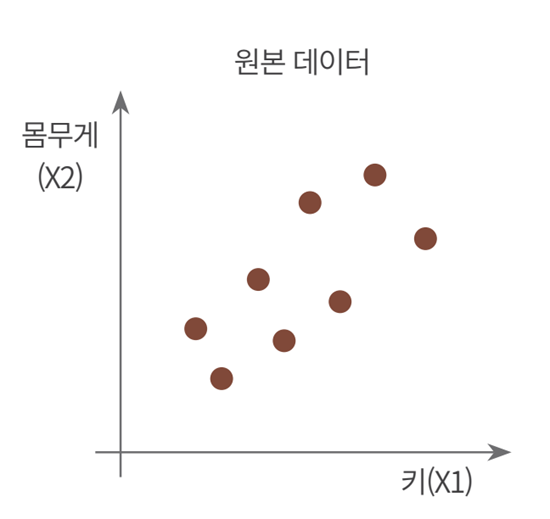    
위 데이터는 X<sub>1</sub>, X<sub>2</sub> 2개의 특성이 있다. 대각선 방향으로 길게 늘어져 있는 형태. 이 데이터에서 분산이 가장 큰 방향은 아래 그래프를 참고하자.
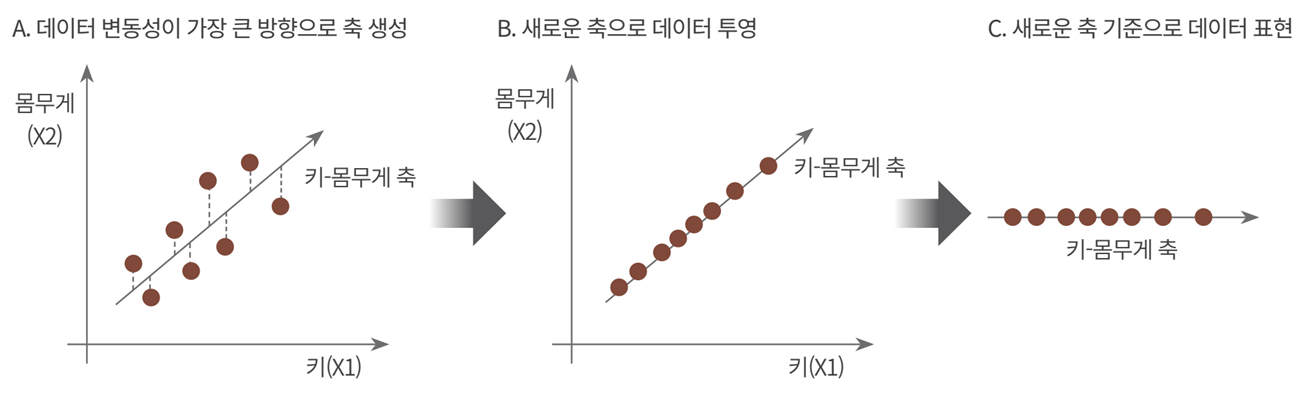

PCA는 가장먼저 가장 큰 분산을 기반으로 첫 번째 벡터 축을 생성하고, 두 번째축은 이 벡터에 직각이 되는 벡터(직교벡터)를 축으로 한다. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터로 설정하며, n개의 특성이 있다면 n개의 벡터 축이 만들어진다. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 축의 개수 만큼 차원으로 원본 데이터가 차원 축소된다.      
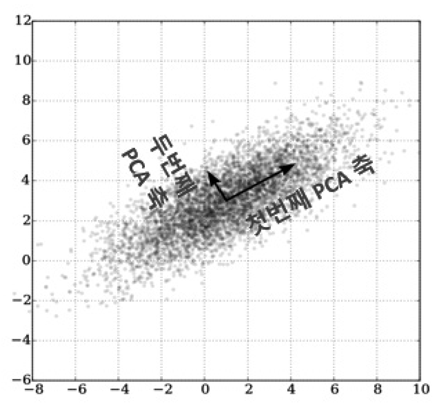

In [4]:
# 한글폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

- 런타임 다시 시작 클릭   
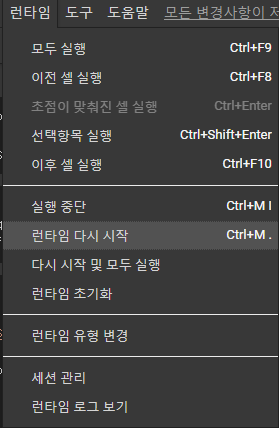

In [1]:
# 런타임 다시 시작 후 다시 실행
import numpy as np
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 사용

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['꽃받침_길이','꽃받침_너비','꽃잎_길이','꽃잎_너비']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,꽃받침_길이,꽃받침_너비,꽃잎_길이,꽃잎_너비,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


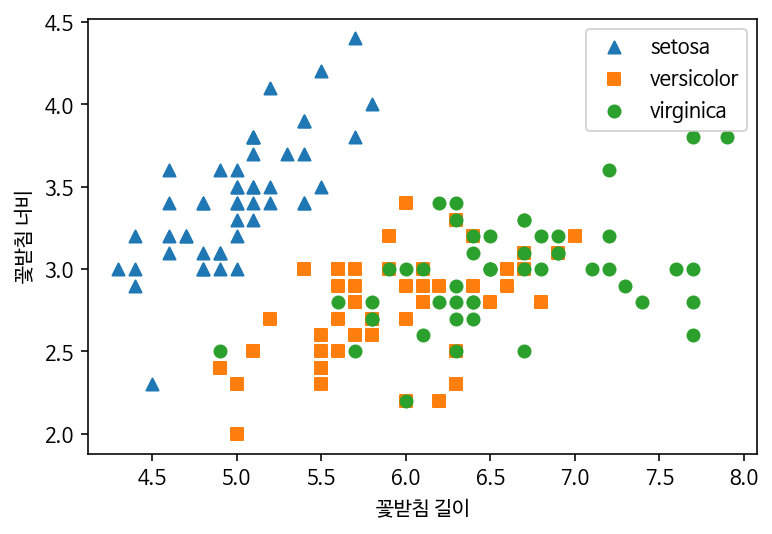

In [3]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['꽃받침_길이']
    y_axis_data = irisDF[irisDF['target']==i]['꽃받침_너비']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('꽃받침 길이')
plt.ylabel('꽃받침 너비')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

스케일링 후 4차원의 붓꽃 데이터를 2차원 PCA로 변환. 사이킷런의 PCA 클래스를 활용.    
n_components 파라미터는 PCA로 변경할 차원의 수를 의미.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


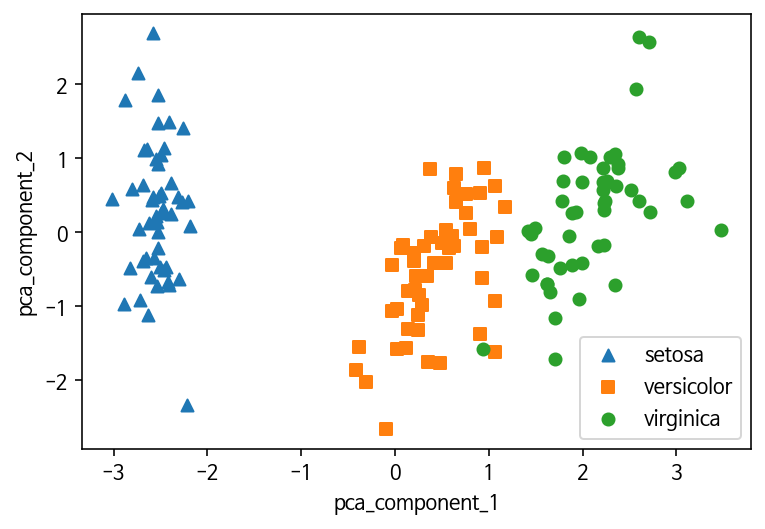

In [8]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [9]:
# explained_variance_ratio_는 PCA 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 나타낸다.
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


pca_component_1은 전체 변동성의 약 76%를 차지하며, pca_component_2는 약 18%를 차지한다. 따라서 두개의 PCA 요소로만 변환해도 원본 데이터의 변동성을 94% 설명 가능하다.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)

[0.98 0.94 0.96]


In [17]:
print(sum(scores)/len(scores))

0.96


In [18]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

[0.98 0.98 1.  ]


In [19]:
print(sum(scores)/len(scores))

0.96
